# Исследование объявлений о продаже квартир

## Краткое описание задачи

Предоставлены данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Шаг 1. Открыть файл с данными и изучить общую информацию**

**Шаг 2. Выполнить предобработку данных**
Определить и изучить пропущенные значения:
Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
Заполнить пропуски, где это уместно. Описать, почему заполнены пропуски именно в этих столбцах и как выбраны значения.
Указать причины, которые могли привести к пропускам в данных.
Привести данные к нужным типам:
Пояснить, в каких столбцах нужно изменить тип данных и почему.

**Шаг 3. Посчитать и добавить в таблицу**
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Шаг 4. Провести исследовательский анализ данных и выполнить инструкции**
Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.

Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.

Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлить до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона.

Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цену, число комнат, высоту потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всей базе?

**Шаг 5. Написать общий вывод**

**Описание данных:**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Шаг 1.  Изучение данных из файла

Считаем файл, выведем часть строк на экран для знакомства с базой данных:

In [1]:
import pandas as pd                                             # Импортируем библиотеку pandas
import seaborn as sns                                           # Импортируем библиотеку seaborn
import matplotlib.pyplot as plt                                 # Импортируем библиотеку matplot.pyplot

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',nrows = 5)    # Считаем первые 5 строк 
df.head()                                                       # Выведем на экран первые строки

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


По данному тексту делаем вывод, что в качестве разделителя нужно использовать комбинацию символов '\t':

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')# Считаем файл с разделителем столбцов "\t"
pd.set_option('display.max_columns', 50)                   # Зададим максимальное кол-во столбцов
df.head()                                                  # Выведем на экран первые строки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Промежуточный вывод: разделитель столбцов выбран верно, разделитель целой и дробной части чисел менять не нужно. Выведем на экран общие данные о данных при помощи метода .info():

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Промежуточный вывод: данные изучены, далее их можно подвергнуть предобработке.


## Шаг 2. Предобработка данных

### Заполнение пропусков

Пропуски в данных есть в столбцах: 'ceiling_height' (высота потолков, м), 'floors_total'(всего этажей в доме, шт), 'living_area'(жилая площадь, м.кв) 'is_apartment'(признак апартаментов), 'kitchen_area'(площадь кухни, м.кв), 'balcony'(кол-во балконов, шт), 'locality_name'(название населенного пункта), 'airports_nearest'(расстояние до ближайшего аэропорта), 'cityCenters_nearest' (расстояние до центра города), 'parks_around3000'(кол-во парков в радиусе 3000 м), 'parks_nearest'(расстояние до ближайшего парка), 'ponds_around3000'(число водоёмов в радиусе 3000 метров), 'ponds_nearest'(расстояние до ближайшего водоёма), 'days_exposition'(длительность публикации объявления о продаже, суток). 

Из указанных столбцов ликвидировать пропуски сразу можно по столбцам 'balcony'(кол-во балконов, шт) и 'is_apartment' (признак апартаментов), заменив пропуски на ноль и ложь исходя из того, что отсутствие информации в данном случае, скорее всего, означает их отсутствие. По остальным столбцам с пропусками предлагается пропуски оставить. 

In [5]:
df['balcony'] = df['balcony'].fillna(0)                 # Заменим пропуски на ноль     
df['is_apartment'] = df['is_apartment'].fillna(False)   # Заменим пропуски на ложь 
#df.info()                                               # Проверим   

### Удаление дубликатов
Посмотрим, сколько в данном датафрейме явных дубликатов:

In [6]:
print('Явных дубликатов =',df.duplicated().sum())

Явных дубликатов = 0


Отлично, удаление явных дубликатов не требуется. С неявными дубликатами ситуация сложнее. Выведем на экран все варианты написания населенных пунктов (столбец 'locality_name'):

In [7]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Первое, что бросается в глаза - много задвоеных названий населенных пунктов, отличающихся только буквой ё/е в слове "посёлок". Чтобы не перегружать будущий словарь при замене названий, сделаем автоматическую замену слов "поселок" на "посёлок" в данном столбце:

In [8]:
display(df['locality_name'].value_counts())   # Выводим на экран кол-во до замены
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок') # Заменяем
df['locality_name'].value_counts()   # Выводим на экран кол-во после замены

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Санкт-Петербург                     15721
посёлок Мурино                        556
посёлок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
посёлок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
посёлок Дзержинского                    1
Name: locality_name, Length: 330, dtype: int64

Количество вариантов написания населенных пунктов снизилось с 364 до 330. Теперь проведем замену со списком:

In [9]:
df['locality_name'] = df['locality_name'].replace({'Мурино':'посёлок Мурино',
    'Кудрово':'деревня Кудрово', 'городской посёлок Рощино':'посёлок городского типа Рощино',
    'село Павлово':'городской посёлок Павлово',
    'посёлок городского типа Мга':'городской посёлок Мга',
    'деревня Фёдоровское':'городской посёлок Фёдоровское',
    'деревня Зимитицы':'посёлок Зимитицы',
    'посёлок при железнодорожной станции Вещево':'посёлок станции Вещево',
    'посёлок Кингисеппский':'Кингисепп','Любань':'посёлок Любань',
    'посёлок городского типа Назия':'городской посёлок Назия',
    'посёлок Калитино':'деревня Калитино','деревня Щеглово':'посёлок Щеглово',
    'село Никольское':'Никольское','посёлок Коммунары':'Коммунар',
    'посёлок городского типа Советский':'городской посёлок Советский',
    'посёлок городского типа Большая Ижора':'городской посёлок Большая Ижора',
    'посёлок Гарболово':'деревня Гарболово'})
display(df['locality_name'].value_counts())   # Выводим на экран кол-во после замены

Санкт-Петербург                    15721
посёлок Мурино                       590
деревня Кудрово                      472
посёлок Шушары                       440
Всеволожск                           398
                                   ...  
деревня Пельгора                       1
посёлок Каложицы                       1
посёлок Платформа 69-й километр        1
посёлок Почап                          1
посёлок Дзержинского                   1
Name: locality_name, Length: 312, dtype: int64

Количество уникальных названий населенных пунктов снизилось до 312, изначально было 364. Проведенные действия в данном подпункте позволят изменить тип столбца на категориальный.

### Изменение типа

Из выведенной на экран информации при помощи метода df.info() видно, что большинство столбцов с числами представлены типом float64, то есть числами с дробным значением. Для увеличения быстродействия в обработке данных, было бы целесообразно изменить тип на целочисленный ("integer") для следующих столбцов (имеющих большие значения, где точность до 0,1 значения не требуется): 'last_price'(последняя цена), 'floors_total'(всего этажей в доме, шт), 'balcony'(кол-во балконов, шт),'airports_nearest'(расстояние до ближайшего аэропорта, м), 'cityCenters_nearest' (расстояние до центра города), 'parks_around3000'(кол-во парков в радиусе 3000 м), 'parks_nearest'(расстояние до ближайшего парка), 'ponds_around3000'(число водоёмов в радиусе 3000 метров), 'ponds_nearest'(расстояние до ближайшего водоёма), 'days_exposition'(длительность публикации объявления о продаже, суток).

Однако, в связи с тем, что метод замены типа .astype('int') работает только для столбцов, не имеющих пропусков, эту операцию можно проделать только со столбцами 'last_price' и 'balcony' (не имеют пропусков):

In [10]:
list_columns_int =['last_price','balcony']                 # Создаем список столбцов
df[list_columns_int] = df[list_columns_int].astype('int')  # Заменяем тип на int
df[list_columns_int].dtypes                                # Проверяем атрибутом dtypes

last_price    int32
balcony       int32
dtype: object

Изменим тип столбца locality_name (название населенного пункта) на категориальный, это снизит объем памяти и время обработки датафрейма:

In [11]:
df['locality_name'] = df['locality_name'].astype('category')  # Заменяем тип на category

Также нужно отметить, что четвертый по счету столбец 'first_day_exposition'(дата публикации объявления) имеет текстовый тип, что не даст возможности работать с датами. Исправляем:

In [12]:
                                                 # Преобразуем текст в дату:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],
    format='%Y-%m-%dT%H:%M:%S')                    # Было 2019-03-07T00:00:00
df['first_day_exposition'].head()                  # Проверим

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

### Изменение очередности столбцов
Откорректируем очередность столбцов в соответствие предоставленной документации (где первый столбец - airports_nearest, а последний -  total_images)

In [13]:
# Выведем на экран заголовки до изменения
display(df.head(0)) 
# Cоздадим желаемый список (согласно документации):
list_columns_int = ['airports_nearest', 'balcony', 'ceiling_height', 'cityCenters_nearest',
    'days_exposition', 'first_day_exposition', 'floor', 'floors_total', 'is_apartment',
    'kitchen_area', 'last_price', 'living_area' , 'locality_name', 'open_plan',
    'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'rooms',
    'studio', 'total_area', 'total_images']
# Выведем на экран заголовки после изменения
df=df[list_columns_int]
df.head(0)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images


Подведем итог предобработки данных: пропуски, где это было возможно, заполнены, наличие дубликатов проверено, неявные дубликаты в столбце с названиями городов заменены, изменен тип некоторых столбцов с числовыми значениями на целочисленный, очередность столбцов приведена в соответствие документации. Выведем еще раз общую информацию датафрейма (видно изменение порядка столюбцов, появление категориального и календарного типа, небольшое снижение объема в МБ):

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   airports_nearest      18157 non-null  float64       
 1   balcony               23699 non-null  int32         
 2   ceiling_height        14504 non-null  float64       
 3   cityCenters_nearest   18180 non-null  float64       
 4   days_exposition       20518 non-null  float64       
 5   first_day_exposition  23699 non-null  datetime64[ns]
 6   floor                 23699 non-null  int64         
 7   floors_total          23613 non-null  float64       
 8   is_apartment          23699 non-null  bool          
 9   kitchen_area          21421 non-null  float64       
 10  last_price            23699 non-null  int32         
 11  living_area           21796 non-null  float64       
 12  locality_name         23650 non-null  category      
 13  open_plan       

## Шаг 3. Расчёты и добавление результатов в таблицу

### Добавим расчет цены квадратного метра жилья

Для этого создадим новый столбец, рассчитанный как отношение последней цены к общей площади.

In [15]:
df['price_square_meter'] =  df['last_price']/df['total_area']         # Создаем столбец
#df.head()                                                            # Проверяем

### Добавим дату

Выполним задание за счет добавления трех столбцов с днем недели, месяцем и годом:

In [16]:
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Также выполним это задание за счет добавления одного столбца с датой в формате 'День_недели, месяц, год':


In [17]:
series_weekday = df['first_day_exposition'].dt.weekday # Создаем series c числом дня недели
def function_weekday(date):                            # Создаем функцию для категорирования
    list_weekday = ['П.н.','В.т.','С.р.','Ч.т','П.т.','С.б.','В.с'] # Создаем список
    return list_weekday[date]
series_weekday = series_weekday.apply(function_weekday)#Обновляем series c названием дня нед.

series_month = df['first_day_exposition'].dt.month  # Создаем series c числом месяца
def function_month(date):                           # Создаем функцию для категорирования
    list_weekday = ['*','Янв.','Февр.','Март','Апр.','Май','Июнь','Июль','Авг.','Сент.','Окт.','Нояб.','Дек.']
    return list_weekday[date]
series_month = series_month.apply(function_month)   #Обновляем series c названием месяца
                                                 # Наконец-то объединяем текст
df['date'] = series_weekday + ', ' + series_month + ', ' + df['first_day_exposition'].dt.year.astype('str')
df.head()

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images,price_square_meter,day,month,year,date
0,18863.0,0,2.70,16028.0,NaN,2019-03-07,8,16.0,False,25.0,13000000,51.0,Санкт-Петербург,False,1.0,482.0,2.0,755.0,3,False,108.0,20,120370.370370,3,3,2019,"Ч.т, Март, 2019"
1,12817.0,2,NaN,18603.0,81.0,2018-12-04,1,11.0,False,11.0,3350000,18.6,посёлок Шушары,False,0.0,NaN,0.0,NaN,1,False,40.4,7,82920.792079,1,12,2018,"В.т., Дек., 2018"
2,21741.0,0,NaN,13933.0,558.0,2015-08-20,4,5.0,False,8.3,5196000,34.3,Санкт-Петербург,False,1.0,90.0,2.0,574.0,2,False,56.0,10,92785.714286,3,8,2015,"Ч.т, Авг., 2015"
3,28098.0,0,NaN,6800.0,424.0,2015-07-24,9,14.0,False,NaN,64900000,NaN,Санкт-Петербург,False,2.0,84.0,3.0,234.0,3,False,159.0,0,408176.100629,4,7,2015,"П.т., Июль, 2015"
4,31856.0,0,3.03,8098.0,121.0,2018-06-19,13,14.0,False,41.0,10000000,32.0,Санкт-Петербург,False,2.0,112.0,1.0,48.0,2,False,100.0,2,100000.000000,1,6,2018,"В.т., Июнь, 2018"


### Добавим этаж (первый/последний/другой)
Для этого создадим функцию для категоризации этажа. Поскольку этой функции нужно будет передать значения двух столбцов, то функции необходимо передать весь датафрейм:

In [18]:
def function_floor(data):                        # Создаем функцию 
    floor = data['floor']                        # Извлекаем столбец со значением этажа
    floors_total = data['floors_total']          # Извлекаем столбец со кол-вом этажей
    if floor==1:                                 # Если этаж равен единице,
        return 'первый'                          # то "первый"                              
    if floor == floors_total:                    # Если этаж равен общему количеству этажей,           
        return 'последний'                       # то "последний"                                   
    return 'другой'                              # В прочих случаях - "другой" (в т.ч. если кол-во этажей не известно)

df['floor_text'] = df.apply(function_floor, axis=1)     # Активируем функцию
df['floor_text'] = df['floor_text'].astype('category')  # Заменяем тип на category для снижения объема данных
#df.info()                                       # Для проверки
#df.head()                                       # Для проверки

### Добавим соотношение площадей
Добавим соотношение площади жилой к общей и площади кухни к общей:

In [19]:
df['proportion_area'] =  df['living_area']/df['total_area'] # Создаем столбец
df['proportion_kitchen'] =  df['kitchen_area']/df['total_area'] # Создаем столбец
#df.info()                                       # Для проверки
#df.head()                                       # Для проверки

Подитожим: в таблицу были добавлены столбцы с необходимыми значениями, можно переходить к анализу


## Шаг 4. Исследовательский анализ данных
### Изучение параметров: площади, цены, числа комнат, высоты потолков
Построим гистрограммы по столбцам, соответствующим указанным параметрам:

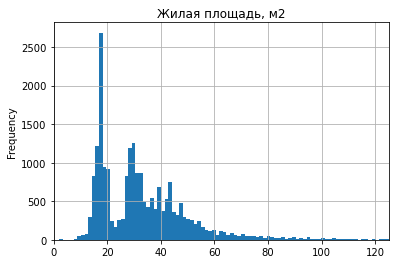

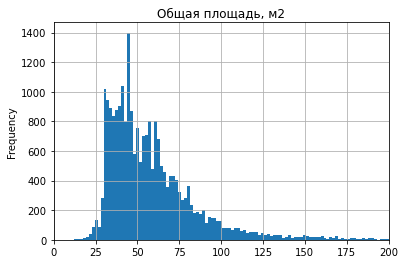

In [20]:
df['living_area'].plot(kind='hist',title='Жилая площадь, м2',bins=300,xlim=(0,125),grid=True)
plt.show()
df['total_area'].plot(kind='hist',title='Общая площадь, м2',bins=500,xlim=(0,200),grid=True)
plt.show()

На гистрограмме жилой площади недвижимости есть большой пик количества продаж квартир жилой площадью от 15 до 21 м2 (вероятно, однокомнатные квартиры), затем провал и следующий пик начинается от 27 м2 до 33 м2 (вероятно, двухкомнатные квартиры). На гистограмме общей площади такой неравномерности нет.

Можно констатировать, что аномалий, которые необходимо было бы удалить из датафрейма нет.

Продолжим анализ гистрограмм по цене, числу комнат и высоте потолков:


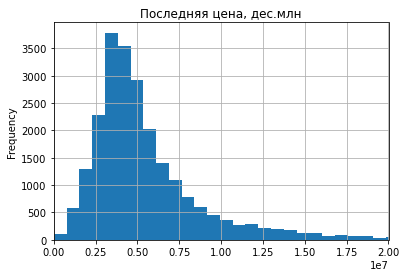

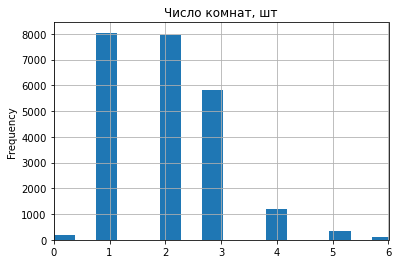

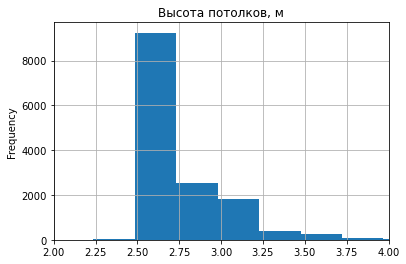

In [21]:
df['last_price'].plot(kind='hist',title='Последняя цена, дес.млн',bins=1000,xlim=(0,20000000),grid=True)
plt.show()                                    # подготовка к новому графику
df['rooms'].plot(kind='hist',title='Число комнат, шт',bins=50,xlim=(0,6),grid=True)
plt.show()                                    # подготовка к новому графику
df['ceiling_height'].plot(kind='hist',title='Высота потолков, м',bins=400,xlim=(2,4),grid=True)
plt.show()                                    # подготовка к новому графику 

Цены на квартиры в своем большинстве варьируются от 2 до 10 млн условных единиц (вероятно, российских рублей).

Число продаж однокомнатных и двухкомнатных комнат примерно одинаково и составляет 8 тыс шт, трехкомнатных квартир на четверть меньше - почти 6 тыс, количество четырехкомнатных квартир примерно в 7 раз меньше одно- и двух-комнатных и составляет 1,2 тыс шт.

В большинстве квартир высота потолков от 2,5 до 2,8 метра. Здесь аномалий также нет.


### Изучение время продажи квартиры
Построим гистрограмму времени продажи квартиры и выведем на экран статистическую информацию при помощи метода .describe():

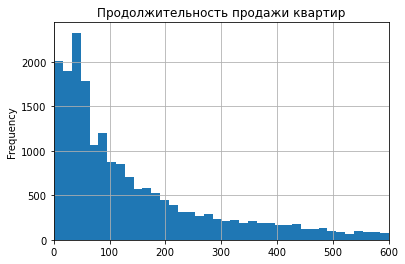

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

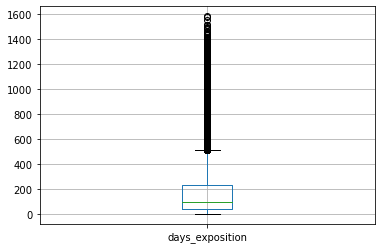

In [22]:
# Построим гистограмму продолжительности продажи квартиры
df['days_exposition'].plot(kind='hist',title='Продолжительность продажи квартир',bins=100,xlim=(0,600),grid=True)
plt.show()                            # подготовка к новому графику
display(df['days_exposition'].describe())# выведем ститистическую информацию
plt.show()                            # подготовка к новому графику
df.boxplot(['days_exposition'])       # построим график - "ящик с усами"
plt.show()                            # подготовка к новому графику

Итак, гистограмма показывает, что продолжительность продажи квартир имеет очень большой диапазон от 1 до 1000 дней и более. Значительная часть квартир продается в первые 100 дней, некоторая часть продается за 200 дней, но сравнительно значительная часть квартир продается более года.

Среднее арифметическое значение здесь составляет 181 день, но в данном случае это значение малоинформативно. Гораздо более информативны в данном случае значение квартилей.

Первый квартиль составляет 45 дней (то есть четверть квартир были проданы за срок, меньший чем 45 дней.) Медиана составляет 95 дней (то есть 50 % квартир были куплены за срок меньший 95 дней, другая половина соответственно за срок больше 95 дней). Третий квартиль - 232 дня (то есть последняя четверть квартир была продана за срок больший, чем 232 дня).

Можно считать, что продажа квартир, осуществленные менее 45 дней (первый квартиль), прошли очень быстро. Продажа квартир, длящаяся более 232 дня (третий квартиль), шла необычно долго. Этот период и ограничивается на диаграмме размаха "ящиком с усами".

Надо отметить, что диаграмма размаха отображает продолжительность продажи квартир свыше 512 дней {(232-45)*1.5+232=512} в виде выбросов, что в данном случае не совсем верно.


### Ликвидация редких и выбивающихся значений

Действительно возможно и необходимо убирать из иследуемого массива данных выбивающиеся значения, которые отражают события, качественно отличающиеся от предмета исследования (напримиер, при исследовании продолжительности заправки на АЗС сверхбыстрое посещение автозаправок за срок менее 50 секунд действительно является фиксацией транзитного проезда автотранспорта через АЗС, а более 5 минут является свидетельством того, что клиенты приехали на АЗС не столько для того, чтобы заправиться, сколько для того, чтобы отдохнуть и перекусить). 

Однако в данном исследовании автор работы не видит причин для исключения редких и выбивающихся значений. Такая процедура могла бы негативно повлиять на качество дальнейшего анализа данных (так, удаление сверхдлинных продаж могла бы затронуть удаление важных точек с очень высокой рыночной стоимости в центре города).

Если бы было необходимо убрать выбросы из датафрейма в части сверхдлинной продолжительности продажи квартир, это можно было бы сделать так:

In [23]:
print('Всего строк:',len(df))                                          # Выведем на экран кол-во строк всего
print('Предполагается удалить:',len(df[df['days_exposition']>=512]))   # Выведем на экран кол-во строк предполагаемых к уд.
print('Что составляет процентов:',round(len(df[df['days_exposition']>=512])/len(df)*100,3))   # И их долю в общем датафрейме
df_corr = df[df['days_exposition']>=512]
#df_corr['days_exposition'].plot(kind='hist',title='Продолжительность продажи квартир',bins=50,xlim=(0,600),grid=True)


Всего строк: 23699
Предполагается удалить: 1674
Что составляет процентов: 7.064


Уберем выбросы по столбцу days_exposition более прогрессивным методом:

In [24]:
low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = df['last_price'].quantile(low_percentele)
last_price_high = df['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Высшая граница last_price {last_price_high}')

print('Процент отброшенных значений = ',round(
        100 - len(df.query('@last_price_low <= last_price <= @last_price_high'))
        / len(df['last_price']) * 100,2),'%')

Нижняя граница last_price 1000000.0
Высшая граница last_price 36000000.0
Процент отброшенных значений =  1.95 %


### Влияние факторов на стоимость квартир

Изучим зависимость стоимости квартир от площади, числа комнат, категории этажности, дня недели размещения объявления, месяца размещения объявления, года размещения объявления, удаленности от центра.

#### Влияние расстояния
Начнем с расстояния до центра города. Построим точечную диаграмму функцией plot и параметром kind='scatter' и выразим корреляцию в числовом выражении.

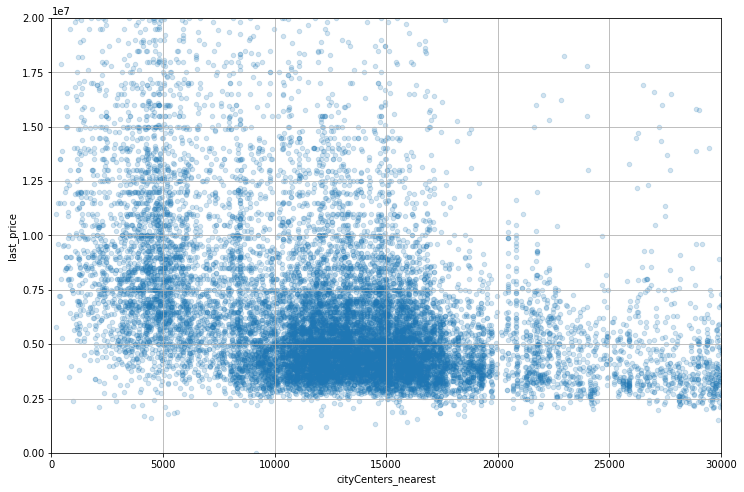

-0.2067473487429839

In [25]:
df.plot(y='last_price',ylim=(0,20000000),kind='scatter',alpha=0.2,legend=True,
    x='cityCenters_nearest',xlim=(0,30000),grid=True,figsize=(12,8))
plt.show()                        # подготовка к новому графику
df['last_price'].corr(df['cityCenters_nearest'])  # Отобразим корреляцию

Конечно, на этом графике можно зафиксировать некую корреляцию - чем больше расстояние от центра, тем цена ниже. В то время, как на расстоянии до 6 км встречаются продажа квартир с ценой даже 20 млн, то на расстоянии от центра свыше 10 км квартиры с ценой выше 10 млн практически не продаются, свыше 20 км цена выше 7 млн маловероятна.

Но этот график построен по разношерстным данным (разным этажам, разного количества комнат, СПб и пригородов), то есть в среднем "по больнице".

Для построения более четкого графика, необходимо сузить датафрейм до более однотипных, сравниваемых данных.

Сузим датафрейм до двухкомнатных квартир, расположенных в Санкт-Петербурге на втором этаже и вызовем график снова...


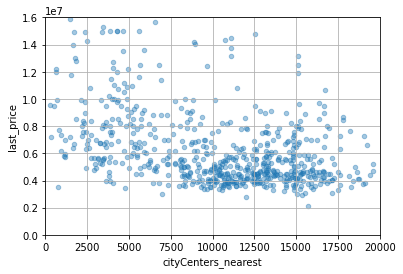

-0.36201189093034913

In [26]:
df_spb_2k = df[df['locality_name']=='Санкт-Петербург'] # Сделаем фильтр по городу
df_spb_2k = df_spb_2k[df_spb_2k['rooms']==2]           # Сделаем фильтр по 2к квартирам
df_spb_2k = df_spb_2k[df_spb_2k['floor']==2]           # Сделаем фильтр по кв на 2 этаже
df_spb_2k.plot(y='last_price',ylim=(0,16000000),kind='scatter',alpha=0.4,legend=True,
    x='cityCenters_nearest',xlim=(0,20000),grid=True,figsize=(6,4))
plt.show()                        # подготовка к новому графику
df_spb_2k['last_price'].corr(df_spb_2k['cityCenters_nearest'])

В результате был получен более четкий график на примере 2-комнатных квартир расположенных на 2 этаже в СПб. 

Конечно, и тут есть большой расброс цен, но в данном случае меньше отвлекающих внимание точек. Здесь нет квартир по цене меньшей, чем за 3 млн, в то время как на прошлом графике таких было очень много.

**Итак, зависимость цены от расстояния есть и она весьма своеобразная:** 

**В одной стороны, в радиусе до 7,5 км квартиры вообще мало подвержены зависимости увеличения цены от расстояния до центра** - тут встречаются квартиры с расбросом цен от 4 до 40 млн руб, по всей видимости цена на квартиру тут зависит от других показателей.

**С другой стороны, на расстоянии от центра свыше 7,5 км квартиры с ценой выше 10 млн практически не продаются (чаще в пределе 4-6 млн), что косвенно подтверждает влияние расстояния от центра на стоимость квартиры.**

Корреляция вычисленная по отфильтрованным данным составила уже -0,36 против -0,2 до фильтрации. То есть, корреляция выраженная в числовом выражении подтверждает небольшую отрицательную связь (снижения цены от увеличения расстояния).

#### Влияние площади
Теперь повторим исследование с площадью. Построим точечную диаграмму функцией plot и параметром kind='scatter' и выразим корреляцию в числовом выражении.

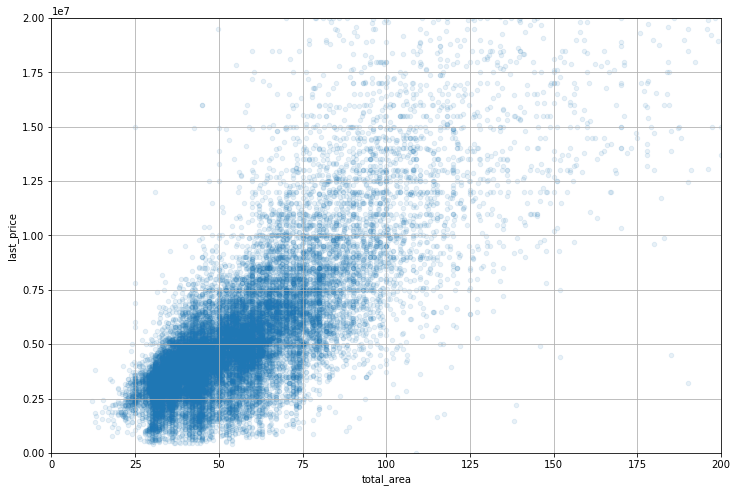

0.6536750579657251

In [27]:
df.plot(y='last_price',ylim=(0,20000000),kind='scatter',alpha=0.1,legend=True,
    x='total_area',xlim=(0,200),grid=True,figsize=(12,8))
plt.show()                        # подготовка к новому графику
df['last_price'].corr(df['total_area'])  # Отобразим корреляцию

Итак, на графике видно хотя и смазанную, но зависимость цены от площади. Корреляция составила 0,65. Для чистоты эксперимента, по аналогии с удаленностью от центра, построим аналогичный график для квартир по Санкт-Петербургу:

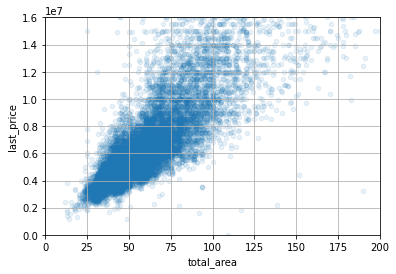

0.6571875752588263

In [28]:
df_spb = df[df['locality_name']=='Санкт-Петербург'] # Сделаем фильтр по городу
df_spb.plot(y='last_price',ylim=(0,16000000),kind='scatter',alpha=0.1,legend=True,
    x='total_area',xlim=(0,200),grid=True,figsize=(6,4))
plt.show()                        # подготовка к новому графику
df_spb['last_price'].corr(df_spb['total_area'])

Здесь, как и ожидалось, графически взаимосвязь более четкая и пропорциональная (хотя корреляция практичеси не изменилась). 

Можно определить верхний предел цен - около 160 тыс руб/м2 (4 млн/25 м2), нижний около 60 тыс руб/м2(6/100). Это примерно в четыре раза дороже цен моего города =).

**Подитожим: зависимость цены от жилой площади прямо пропорциональная.**

#### Влияние количества комнат

Повторим исследование с количеством комнат. Построим столбчатую диаграмму функцией plot и параметром kind='bar' по медианным значениям:

,last_price
rooms,
0,2700000
1,3600000
2,4770169
3,6200000
4,9000000
5,14000000
6,19000000


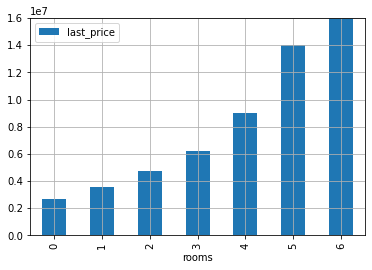

In [29]:
pivot_table = df.pivot_table(index=['rooms'],values='last_price',aggfunc='median')
pivot_table = pivot_table[0:7]    # Создаем водную таблицу и обрезаем её
display(pivot_table)

pivot_table.plot(y='last_price',ylim=(0,16000000),kind='bar',legend=True,
    xlim=(0,5),grid=True,figsize=(6,4)) # Строим гистограмму
plt.show()                         # подготовка к новому графику

Итак, **можно констатировать наличие прямо пропорциальной зависимости цены квартир от количества комнат**. Пятикомнатные квартиры стоят почти в 4 раза дороже однокомнатных.

#### Влияние категории этажности. 

Осуществим исследование на предмет влияния категории этажности. 
В связи с бесперспективностью графической визуализации точечным графиком зависимости цены от категории этажности, где по оси х будут всего три категории этажности (по аналогии с точечным графиком зависимости от количества комнат), и невозможности расчета корреляции (тип текстовый/категориальный), выполним исследование следующим образом:

Построим точечную диаграмму, где по оси х будет общая площадь квартиры, но при этом разные категории этажности отобразим разными цветами: первые этажи будут красным цветом, последние синим цветом, остальные зеленым.

          Последние этажи - синим цветом
          Первые этажи - красным цветом
          Другие этажи - зеленым цветом


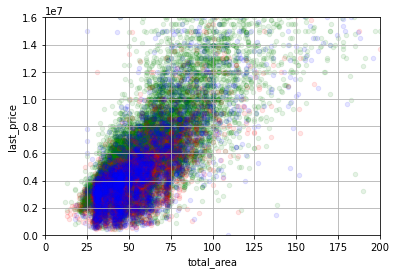

In [30]:
df_1 = df[df['floor_text']=='первый'] # переменной передадим первые этажи
df_9 = df[df['floor_text']=='последний'] # переменной передадим последние этажи
df_x = df[df['floor_text']=='другой'] # переменной передадим остальные этажи

# точки остальных этажей передаем переменной model_x:
model_x = df_x.plot(y='last_price',ylim=(0,16000000),kind='scatter',alpha=0.1,color="g",legend=True,
    x='total_area',xlim=(0,200),grid=True,figsize=(6,4))

# точки первых (и вместе с ними остальных этажей) передаем переменной model_1:
model_1 = df_1.plot(y='last_price',ax=model_x,ylim=(0,16000000),kind='scatter',alpha=0.1,color='r',legend=True,
    x='total_area',xlim=(0,200),grid=True,figsize=(6,4))

# строим график с переменной model_1:
df_9.plot(y='last_price',ax=model_1,ylim=(0,16000000),kind='scatter',alpha=0.1,color='b',legend=True,
    x='total_area',xlim=(0,200),grid=True,figsize=(6,4))
print('          Последние этажи - синим цветом')
print('          Первые этажи - красным цветом')
print('          Другие этажи - зеленым цветом')

Построим столбчатую диаграмму с медианными значениями цены с дифференциацией по категории этажности при помощи сводной таблицы:

,last_price
floor_text,
другой,4850000
первый,3900000
последний,4300000


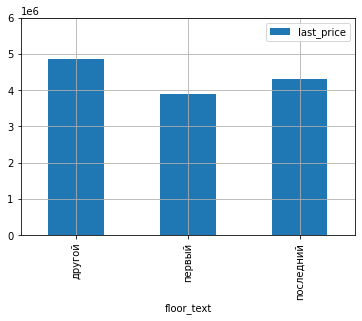

In [31]:
pivot_table_floor = df.pivot_table(index=['floor_text'],values='last_price',aggfunc='median')
display(pivot_table_floor)

pivot_table_floor.plot(y='last_price',ylim=(0,6000000),kind='bar',legend=True,
    xlim=(0,5),grid=True,figsize=(6,4)) # Строим гистограмму
plt.show()                         # подготовка к новому графику

Итак, на основании столбчатой диаграммы делаем вывод о том, что **квартиры первого этажа имеют наменьшую цену, квартиры на последних этажах находятся в среднем ценовом диапазоне, а квартиры на других этажах имеют наиболее высокую цену.**

#### Влияние дня недели, месяца и года

Построим столбчатые диаграммы цен на квартиры с дифференциацией по дню недели, месяцу и году при помощи сводных таблиц:

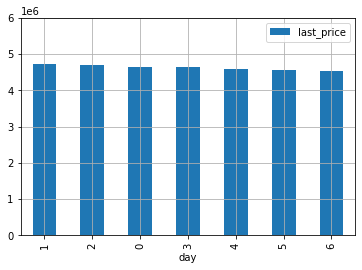

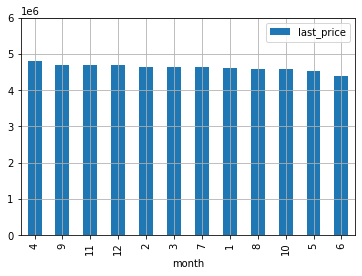

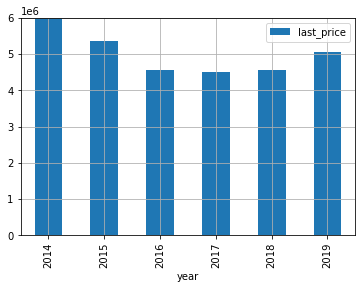

In [32]:
list_columns = ['day', 'month']                                      # Создадим список нужных столбцов
for i in list_columns:                                               # Создадим цикл, который пройдет по всему списку
    (df.pivot_table(index=[i],values='last_price',aggfunc='median')  # Сводная таблица
    .sort_values(by='last_price',ascending=False)                    # Сортировка для визуализации
    .plot(y='last_price',ylim=(0,6000000),kind='bar',legend=True,xlim=(0,5),grid=True,figsize=(6,4))) # Строим гистограмму
    plt.show()                                                       # подготовка к новому графику
    
(df.pivot_table(index=['year'],values='last_price',aggfunc='median')  # Сводная таблица
    .plot(y='last_price',ylim=(0,6000000),kind='bar',legend=True,xlim=(0,5),grid=True,figsize=(6,4))) # Строим гистограмму
plt.show()                                                           # подготовка к новому графику

**Выводы: разные дни недели публикации объявления не оказывает серьезного влияния на цену квартир.**

**Сезонность оказывает небольшое влияние на цену. Так, наименьшие цены фиксируются в июне, наибольшие в апреле и сентябре.**

**С 2014 по 2016 квартиры падали в цене, затем с 2016 по 2018 год цены оставались на одном уровне, с 2019 года цена снова стала расти.**

### Изучение разницы между населенными пунктами
Выберем 10 населенных пунктов с наибольшим количеством объявлений, сохраним их в переменной, создадим сводную таблицу по этим данным с медианым значением стоимости квадратного метра:

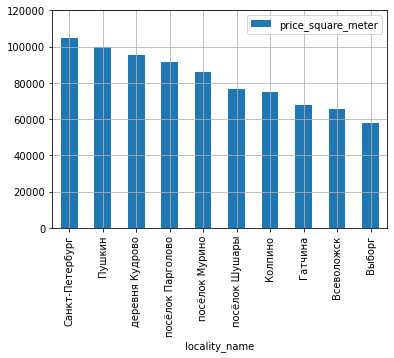

,price_square_meter
locality_name,
Санкт-Петербург,104761.904762
Пушкин,100000.000000
деревня Кудрово,95675.473579
посёлок Парголово,91642.857143
посёлок Мурино,86175.643522
посёлок Шушары,76876.172608
Колпино,74723.748474
Гатчина,67796.610169
Всеволожск,65789.473684


In [33]:
#display(df['locality_name'].value_counts().head(10)) # Выводим на экран 10 нас.пунктов
top10_city = df['locality_name'].value_counts().head(10) # Сохраним в переменной
df_top_10 = df.query('locality_name in @top10_city.index') # Сделаем срез до списка top_10
#display(df_top_10)
#  Создадим сводную таблицу:
pivot_table_top10 = df_top_10.pivot_table(index='locality_name',values='price_square_meter',aggfunc='median').sort_values(by='price_square_meter',ascending=False)
# Строим гистограмму:
pivot_table_top10.plot(y='price_square_meter',ylim=(0,120000),kind='bar',legend=True,
    xlim=(0,5),grid=True,figsize=(6,4)) 
plt.show()                            # подготовка к новому графику
pivot_table_top10

In [34]:
display(df.groupby('locality_name')['price_square_meter'].mean().sort_values(ascending=False))
#

locality_name
Зеленогорск              115122.799198
Санкт-Петербург          114849.008794
посёлок Репино           104238.614786
Пушкин                   103125.819291
Сестрорецк               101757.616875
                             ...      
посёлок Совхозный         12629.129129
деревня Выскатка          12335.480902
деревня Вахнова Кара      11688.311688
посёлок станции Свирь     11481.481481
деревня Старополье        11206.221198
Name: price_square_meter, Length: 312, dtype: float64

Следовательно, **среди десяти населенных пунктов с самой большой продажей квартир самая дорогая недвижимость в Санкт-Петербурге (105 тыс руб/м2), самая дешевая в Выборге (58 тыс руб/м2)**.  

Но среди всей базы данных **населенный пункт с самой дорогим жильем - Зеленогорск, с самым дешевым - деревня Старополье** (между ними разница в 10 раз).

### Выделение центра Санкт-Петербурга
Отфильтруем датафрейм по городу Санкт-Петербургу, построим сводную таблицу со средним (медианным) значением цены квартиры и на основании сводной таблицы построим гистограмму.

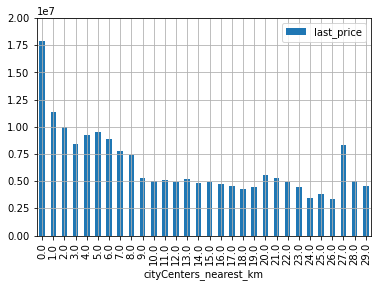

In [35]:
df_spb = df.loc[df['locality_name']=='Санкт-Петербург'].reset_index() # Сделаем фильтр по городу плюс reset_index()
df_spb['cityCenters_nearest_km'] =  round(df_spb['cityCenters_nearest']/1000,0)
#display(df_spb)
pivot_table_km = df_spb.pivot_table(index=['cityCenters_nearest_km'],values='last_price',aggfunc='median')
#display(pivot_table_km)
pivot_table_km.plot(y='last_price',ylim=(0,20000000),kind='bar',legend=True,
    xlim=(0,5),grid=True,figsize=(6,4)) # Строим гистограмму
plt.show()                         # подготовка к новому графику

Подитожим данное исследование: стоимость квартир значительно снижается на **рубеже 8 км** от центра, следовательно эту часть города можно отнести к центральной зоне.  

### Исследование центра Санкт-Петербурга
#### Изучение параметров
Построим гистрограммы по столбцам, соответствующим таким параметрам, как общая площадь, цена, высота потолков:

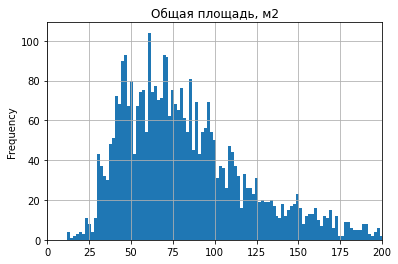

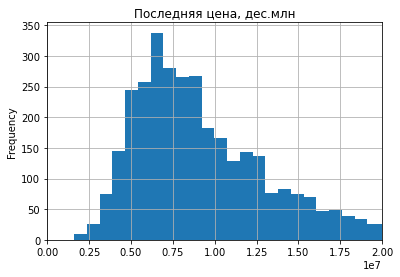

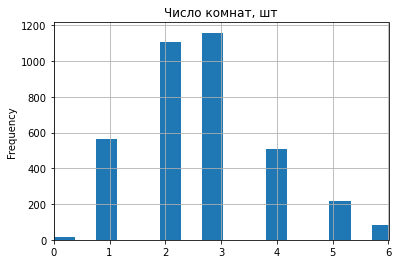

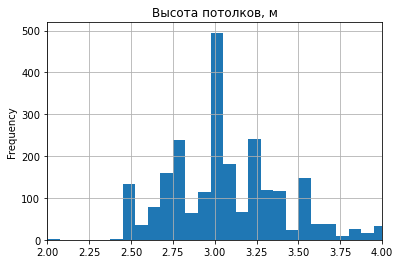

In [36]:
df_spb_8 = df.loc[df['cityCenters_nearest']<8000] # Сделаем фильтр по 8 км СПб
df_spb_8['total_area'].plot(kind='hist',title='Общая площадь, м2',bins=500,xlim=(0,200),grid=True)
plt.show()
df_spb_8['last_price'].plot(kind='hist',title='Последняя цена, дес.млн',bins=1000,xlim=(0,20000000),grid=True)
plt.show()                                    # подготовка к новому графику
df_spb_8['rooms'].plot(kind='hist',title='Число комнат, шт',bins=50,xlim=(0,6),grid=True)
plt.show()                                    # подготовка к новому графику
df_spb_8['ceiling_height'].plot(kind='hist',title='Высота потолков, м',bins=400,xlim=(2,4),grid=True)
plt.show()                                    # подготовка к новому графику 

Если в среднем по Санкт-Петербургу и пригородам значительную долю квартир занимала недвижимость с общей площадью 30-60 м2 с пиком около 40 м2, и где доля квартир с площадью более 80-100 м2 была ничтожна, то по центральной части Санкт-Петербурга наибольшее количество квартир приходится на 60 м2, значительную часть занимают квартиры от 40 до 100 м2, и квартиры с площадью в 170 м2 занимают довольно значительную долю.

На гистограмме распределения цен по центру Санкт-Петербурга по сравнению с общей базой данных столбцы сдвинуты вправо и располагаются напротив цен с примерно в 1,5 раза большими значениями.

Отличается и число комнат. Если в общей базе количество однокомнатных и двухкомнатных квартир было примерно поровну, а трехкомнатных на четверть меньше, четырехкомнатных в 7 раз меньше двух- и одно-комнатных, то по центральной части СПб наоборот доминируют трехкомнатные квартиры, к ним приближаются двухкомнатные, но однокомнтаных квартир примерно в два раза меньше, чем двухкомнатных. Число четырехкомнатных квартир здесь сопоставимо с однокомнатными, в то время как в общей базе их было в 7 раз меньше.

Разительно отличается и высота потолков, в общем датафрейме большинство квартир было с высотой потолков в 2,5-2,75 метра, по центральной зоне Санкт-Петербурга наибольшее количество квартир имеет высоту потолков в 3,0 метра, а количество квартир в СПб с высотой 3,5 метра примерно столько же, сколько и 2,5 метра (что по общему датафрейму предположить было бы сложно).


#### Влияние факторов на цену
##### Влияние расстояния
Начнем с расстояния до центра города. Построим точечную диаграмму функцией plot и параметром kind='scatter' и выразим корреляцию в числовом выражении.

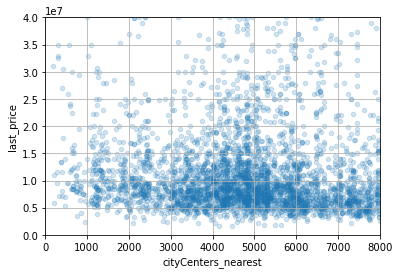

-0.048143523441800305

In [37]:
df_spb_8.plot(y='last_price',ylim=(0,40000000),kind='scatter',alpha=0.2,legend=True,
    x='cityCenters_nearest',xlim=(0,8000),grid=True,figsize=(6,4))
plt.show()                        # подготовка к новому графику
df_spb_8['last_price'].corr(df_spb_8['cityCenters_nearest'])  # Отобразим корреляцию

**Вывод простой и очевидный: и значение корреляции, и график свидетельствует об отсутствии практического влияния на цену квартир расстояние от центра**.  

##### Влияние площади
Теперь повторим исследование с площадью. Построим точечную диаграмму функцией plot и параметром kind='scatter' и выразим корреляцию в числовом выражении.

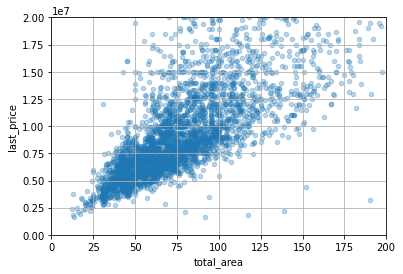

0.6364063831483328

In [38]:
df_spb_8.plot(y='last_price',ylim=(0,20000000),kind='scatter',alpha=0.3,legend=True,
    x='total_area',xlim=(0,200),grid=True,figsize=(6,4))
plt.show()                        # подготовка к новому графику
df_spb_8['last_price'].corr(df_spb_8['total_area'])  # Отобразим корреляцию

**Вывод: на стоимость квартир очень сильно влияет ее площадь.**

##### Влияние количества комнат
Повторим исследование с количеством комнат. Построим точечную диаграмму функцией plot и параметром kind='scatter' и выразим корреляцию в числовом выражении.

,last_price
rooms,
0,4665000
1,5950000
2,7664000
3,9990000
4,12300000
5,14945000
6,19500000


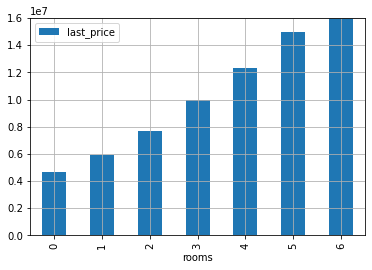

In [39]:
pivot_table_spb_8 = df_spb_8.pivot_table(index=['rooms'],values='last_price',aggfunc='median')
pivot_table_spb_8 = pivot_table_spb_8[0:7]    # Создаем водную таблицу и обрезаем её
display(pivot_table_spb_8)

pivot_table_spb_8.plot(y='last_price',ylim=(0,16000000),kind='bar',legend=True,
    xlim=(0,5),grid=True,figsize=(6,4)) # Строим гистограмму
plt.show()                         # подготовка к новому графику

**Вывод: на стоимость квартир очень сильно влияет и количество комнат в квартире**

##### Влияние категории этажности. 
Осуществим исследование на предмет влияния категории этажности. 

Построим столбчатую диаграмму цен на квартиры с дифференциацией по категории этажности:

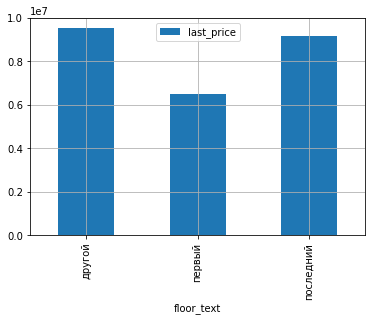

In [40]:
pivot_table_floor_text_spb_8 = df_spb_8.pivot_table(index=['floor_text'],values='last_price',aggfunc='median')
pivot_table_floor_text_spb_8.plot(y='last_price',ylim=(0,10000000),kind='bar',legend=True,
                                  xlim=(0,5),grid=True,figsize=(6,4)) # Строим гистограмму
plt.show()                         # подготовка к новому графику

Итак, главное отличие здесь от прочих домов в том, что квартиры на верхних этажах имеют цену практически такую же, как и на других этажах. 

#####  Влияние дня недели, месяца и года

Построим столбчатые диаграммы цен на квартиры с дифференциацией по дню недели, месяцу и году при помощи сводных таблиц:

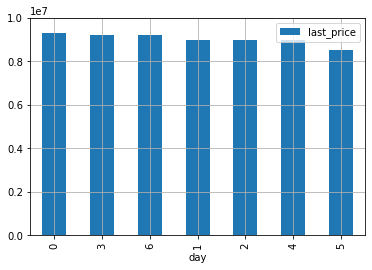

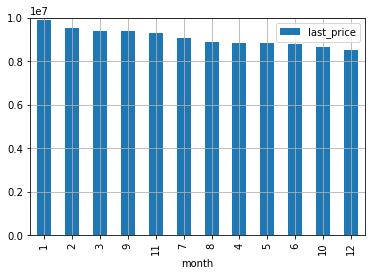

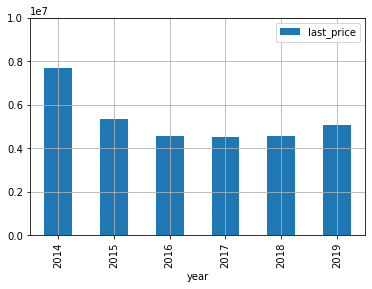

In [41]:
list_columns = ['day', 'month']                                      # Создадим список нужных столбцов
for i in list_columns:                                               # Создадим цикл, который пройдет по всему списку
    (df_spb_8.pivot_table(index=[i],values='last_price',aggfunc='median')  # Сводная таблица
    .sort_values(by='last_price',ascending=False)                    # Сортировка для визуализации
    .plot(y='last_price',ylim=(0,10000000),kind='bar',legend=True,xlim=(0,5),grid=True,figsize=(6,4))) # Строим гистограмму
    plt.show()                                                       # подготовка к новому графику
    
(df.pivot_table(index=['year'],values='last_price',aggfunc='median')  # Сводная таблица
    .plot(y='last_price',ylim=(0,10000000),kind='bar',legend=True,xlim=(0,5),grid=True,figsize=(6,4))) # Строим гистограмму
plt.show()                                                           # подготовка к новому графику


**Итак, тут заметно некоторое снижение цен на квартиры, выставленные на продажу в субботу.**

**Существует некоторая сезонная зависимость цены от месяца. Так, наибольшие цены в январе и феврале, а наименьшие в октябре и декабре.**

**Цены на квартиры, как и в общей базе данных снижались с 2014 до 2016 года, затем в течение 2016-2018 года держались примерно на одном уровне, после чего в 2019 году подорожали.**

## Общий вывод

В результате исследования установлено:

**1.Общая характеристика квартир:**
- Цены варьируются от 2 до 10 млн рублей и более;
- Число однокомнатных и двухкомнатных квартир составляет по 8 тыс шт, трехкомнатных квартир почти 6 тыс, количество четырехкомнатных квартир всего 1,2 тыс шт;
- Значительная часть квартир имеет общую площадь 30-60 м2 с пиком около 40 м2;
- Высота потолков в большинстве квартир потолков от 2,5 до 2,8 метра. 

**2. Показатели продолжительности продажи квартир:**
- Общая продолжительность: от 1 до 1000 дней и более; 
- Среднее арифметическое значение продолжительности: 181 день;
- Первый квартиль: 45 дней (граница быстрой продажи);
- Медиана: 95 дней;
- Третий квартиль: 232 дня (граница необычайно долгой продажи).
- Критерий быстрой

**3. Влияние факторов на стоимость большинства квартир**
- Влияние расстояния прослеживается на расстоянии от 7,5-8 км от центра;
- Влияние площади на цену прямо пропорциональное; 
- Среди 10 населенных пунктов с наибольшим числом объявлений верхний предел цен в Санкт-Петербурге (105 тыс руб/м2), нижний предел цен в Выборге (58 тыс руб/м2);  
- Влияние количества комнат промо пропорциональное (пятикомнатные квартиры стоят почти в 4 раза дороже однокомнатных);
- Влияние категории этажности: самые дешевые на первом этаже, средняя цена на последних этажах и самые наибольшие цены на прочих этажах;
- Влияние дня недели не оказывает серьезного влияния на цену квартир;
- Сезонность оказывает небольшое влияние на цену (наименьшие цены фиксируются в июне, наибольшие в апреле и сентябре);
- С 2014 по 2016 квартиры падали в цене, затем с 2016 по 2018 год цены оставались на одном уровне, с 2019 года цена снова стала расти.

**4. Особенности ценообразования в центре Санкт-Петербурга:**
- Центральная зона определена в радиусе 8 км от центра (по резкому изменению стоимости квартир);
- Значительная часть квартир имеет общую площадь от 40 до 100 м2, причем квартиры с площадью в 170 м2 занимают довольно значительный сегмент;
- В центральной части СПб доминируют трехкомнатные квартиры, сравнительно много четырехкомнатных, однокомнтаных квартир мало;
- Высота потолков у большинства квартир 3,0 метра, значительная часть квартир имеет высоту потолков 3,5 метра;
- Влияние расстояния на стоимость квартир в центре города не прослеживается;
- Влияние площади и влияние количества комнат аналогичное общей базе данных (прямо пропорциональное);
- Влияние категории этажности: квартиры на верхних этажах имеют цену практически такую же, как и на других этажах.
- Влияние дня недели: прослеживается некоторое снижение цен на квартиры, выставленные на продажу в субботу;
- Влияние сезонности: наибольшие цены в январе и феврале, а наименьшие в октябре и декабре;
- Динамика цен на квартиры в центре аналогична общей базе данных.